In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import math
from glob import glob

In [11]:
output = []
voting = "borda"
step = 6

for path in glob(f"data/experiment_3_method_*_profile_100_step_{step}_{voting}.csv"):
    tmp = pd.read_csv(path)

    output.append(tmp)

data = pd.concat(output, ignore_index=True)
data["pvt"] = (data["starting_id"] == data["custom_id"]) & (data["rank"] == 1)
data["percentage"] = (data["size"] - 100) / 100
data.head()

data["profile_id"] = data.groupby(["n_alternatives", "starting_id", "type", "custom_id", "size", "rank"]).cumcount() + 1
data = data.sort_values("percentage")

data = data[data["pvt"] == True].drop_duplicates(
    subset = ["n_alternatives", "type", "starting_id", "profile_id"], keep = "first")
data.head()

,alternative,value,rank,size,iteration,custom_id,alternative_of_interest,starting_id,type,n_alternatives,method,voting,step,pvt,percentage,profile_id
628372,4,0.743382,1,100,0,2,True,2,UM50,7,UM50,borda,6,True,0.0,2
661935,5,0.000000,1,100,0,7,True,7,UM50,7,UM50,borda,6,True,0.0,1
627777,0,0.000000,1,100,0,2,True,2,UM50,7,UM50,borda,6,True,0.0,1
634441,6,0.500000,1,100,0,2,True,2,UM50,7,UM50,borda,6,True,0.0,3
600067,1,0.800000,1,100,0,2,True,2,UM50,6,UM50,borda,6,True,0.0,1


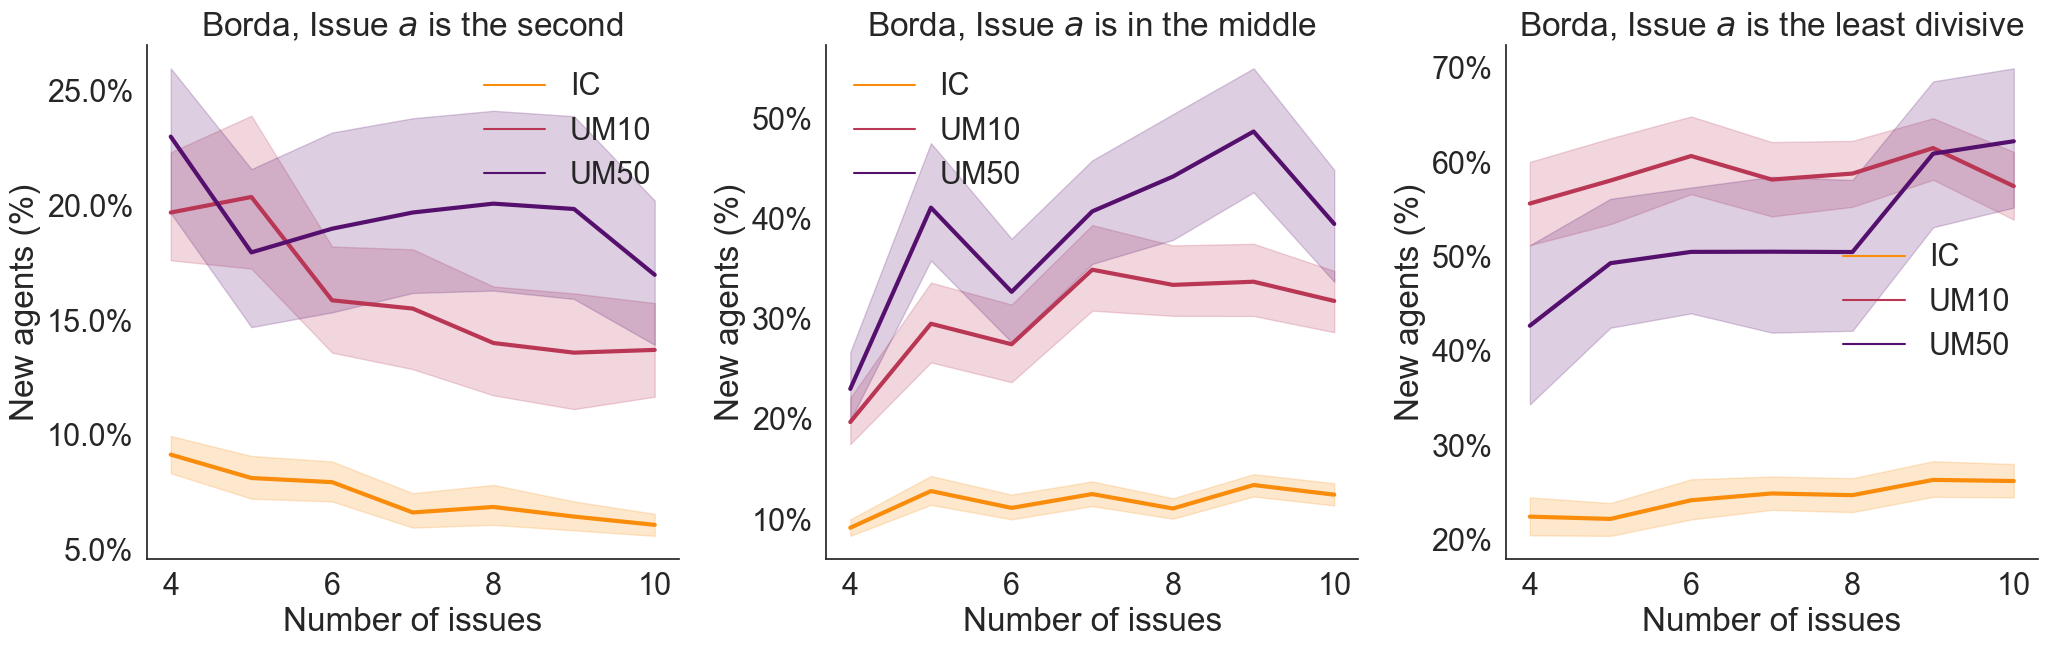

In [12]:
sns.set(font_scale=2, style="white")

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(21, 7))

i = 0
for tmp, title in [
    (data[data["starting_id"] == 2], "Issue $a$ is the second"),
    (data[data["starting_id"] == data["n_alternatives"].apply(lambda x: math.ceil(x/2))], "Issue $a$ is in the middle"), 
    (data[data["n_alternatives"] == data["starting_id"]], "Issue $a$ is the least divisive")
]:
    ax = axs[i]
    sns.lineplot(x="n_alternatives", palette="inferno_r", y="percentage", lw=3, 
        hue="type",
        color=["#2ea581", "#d95f02", "#7d79b7"],
        hue_order=["IC", "UM10", "UM50"], data=tmp, ax=ax)
    i += 1
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

    ax.set_xlabel("Number of issues")
    ax.set_title(f"{voting.title()}, {title}")
    ax.set_ylabel("New agents (%)")
    ax.legend(title="", frameon=False, shadow=False, fancybox=False)

sns.despine()

# fig.savefig(f"figures/summary_{voting}_each_{step}_new_agents.pdf", bbox_inches="tight")

fig.tight_layout()
